# Homework 6

In [28]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from pandas.stats.api import ols
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

When the functional form of the posterior is the same as that of the prior (as modified by Bayesian likelihood), that prior is called a “conjugate prior”. The conjugate prior for this univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ is 
$$ w\sim {\cal N}(w^*,\sigma^*) $$

# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?

If all the components of $w$ having the same prior $w_j\sim{\cal N}(0,\sigma/\sqrt{\lambda})$, it leads to Rigde regression.

An alternative choice of the Laplacian prior distribution $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$, it leads to Lasso regression

# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

The Ridge regression would produce the solution in the closed form, it's similar to that of OLS. But the former shrinks the estimated coefficients towards zero. The parameter, $\lambda$ controls the strength of penalty term (i.e. the impact of the shrinking)

b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

The Lasso regression is capable to completely eliminate coefficients (make they '0')in some case. Therefore, this method can be also used in varible selection. On the other hand, Ridge regression only can make the coefficients close to zero, but not exactly to zero.

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

When $\lambda$= 0 , the two regressions are identical to the OLS.  

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

If the dataset is small, I would use both training and test set when estimating the $\lambda$, in order to aviod noisy and unrealiable models caused by insufficience of data. It's a goodtime to apply cross-validation, by which the sample data is splited randomly for further operating.  

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

In [6]:
sigma=1; y=12; x=2

RE1w=5
RE1s=1

s2=sigma**-2; s1=RE1s**-2
RE2w=(s2*(y*x)+s1*RE11w)/(s2*(x**2)+s1)
RE2s=(s2*(x**2)+s1)**(-0.5)
print('w ~ N({0},{1})'.format(RE2w,RE2s))

w ~ N(5.8,0.4472135955)


In [22]:
import math
math.sqrt(0.4472135955)

0.6687403049764534

In [25]:
from scipy.stats import norm
p < norm.cdf(5,5.8,0.6687403049764534)
p

0.11579384559276296

# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [29]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_training.csv")
y_train=np.asarray(data_train.iloc[:,-1]) # make dependent variable
X_train=np.asarray(data_train.iloc[:,1:-2]) #make independent variables

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_test.csv")
y_test=np.asarray(data_test.iloc[:,-1]) # make dependent variable
X_test=np.asarray(data_test.iloc[:,1:-2]) #make independent variables

In [35]:
Linear = linear_model.LinearRegression(fit_intercept=False) 
Linear.fit(X_train,y_train)

p_IS=Linear.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Linear=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Linear is: {0}".format(R_2_IS_Linear))

Linear_coef=Linear.coef_

p_OS=Linear.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Linear=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Linear is: {0}".format(R_2_OS_Linear))

The R-squared we found for IS Linear is: 0.99999384965
The R-squared we found for OS Linear is: -2.37732494556


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [33]:
Lasso = linear_model.Lasso(fit_intercept=False, alpha=40)
Lasso.fit(X_train,y_train)

p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))

Lasso_coef=Lasso.coef_

p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.865680167019
The R-squared we found for OS Lasso is: 0.651920708312


In [34]:
Ridge = linear_model.Ridge(fit_intercept=False, alpha=40000)
Ridge.fit(X_train,y_train)

p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.846360797693
The R-squared we found for OS Ridge is: 0.672787708143


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

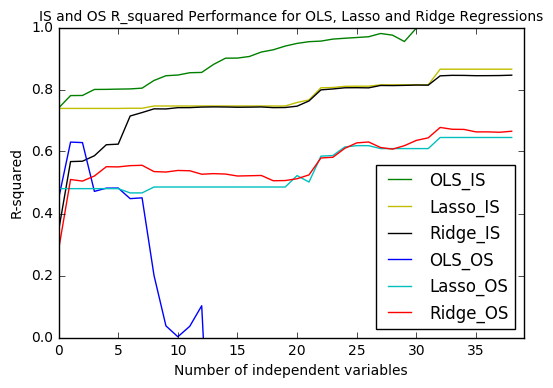

In [34]:
Number_variables=range(39)
Linear_R_2_OS=[]
Linear_R_2_IS=[]

Lasso_R_2_OS=[]
Lasso_R_2_IS=[]

Ridge_R_2_OS=[]
Ridge_R_2_IS=[]

for i in Number_variables:
    
    X_train_regressor = X_train[:,:i+1]
    X_test_regressor = X_test[:,:i+1]
    
    Linear.fit(X_train_regressor,y_train)
    Lasso.fit(X_train_regressor,y_train)
    Ridge.fit(X_train_regressor,y_train)
    
    Linear_R_2_OS.append(Linear.score(X_test_regressor, y_test))
    Linear_R_2_IS.append(Linear.score(X_train_regressor, y_train))
    
    Lasso_R_2_OS.append(Lasso.score(X_test_regressor, y_test))
    Lasso_R_2_IS.append(Lasso.score(X_train_regressor, y_train))
                         
    Ridge_R_2_OS.append(Ridge.score(X_test_regressor, y_test))
    Ridge_R_2_IS.append(Ridge.score(X_train_regressor, y_train))


    
plt.title('IS and OS R_squared Performance for OLS, Lasso and Ridge Regressions',fontsize =10)

plt.plot(Number_variables,Linear_R_2_IS,'g',label='OLS_IS')
plt.plot(Number_variables,Lasso_R_2_IS,'y',label='Lasso_IS')
plt.plot(Number_variables,Ridge_R_2_IS,'k',label='Ridge_IS')

plt.plot(Number_variables,Linear_R_2_OS,'b',label='OLS_OS')
plt.plot(Number_variables,Lasso_R_2_OS,'c',label='Lasso_OS')
plt.plot(Number_variables,Ridge_R_2_OS,'r',label='Ridge_OS')

plt.legend(loc='best')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.ylim(0,1)
plt.xlim(0,39)
plt.show()

# Extracredit (25%)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

In [56]:
from sklearn.model_selection import train_test_split

In [94]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='best')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

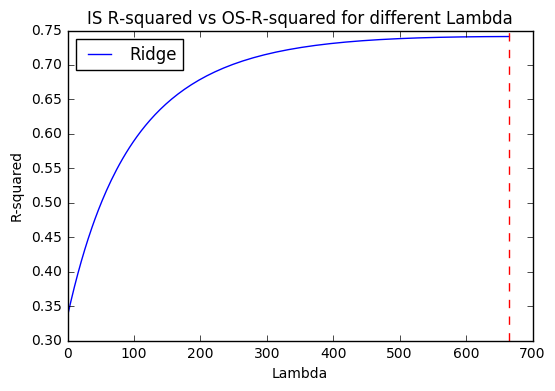

Optimal lambda for Ridge = 665.141633044


In [101]:
lambdas = np.exp(np.linspace(-5,6.5,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)

print('Optimal lambda for Ridge = {0}'.format(lambda_r_optimal))

In [102]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) 

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.929015720303
The R-squared we found for OS Ridge is: 0.265405430796


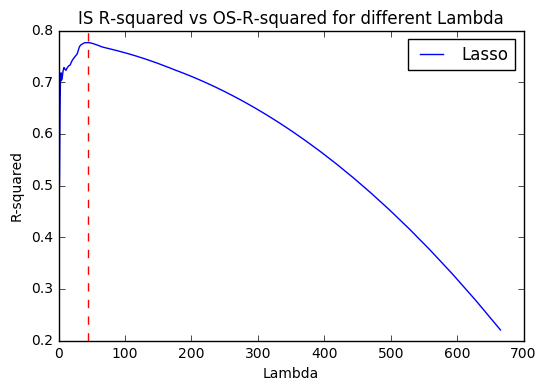

Optimal lambda for Lasso = 43.9881200232


In [99]:
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)

print('Optimal lambda for Lasso = {0}'.format(lambda_l_optimal))

In [100]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.929015720303
The R-squared we found for OS Lasso is: 0.67869427672


# Best of Luck!!